# This notebook provides an example of the workflow to apply HECTOR

We first import the required modules

In [7]:
import time
import sys
sys.path.append('./das/')
from Detector import Detector
import wget

Let's download FORGE data

In [6]:
url = 'https://pando-rgw01.chpc.utah.edu/silixa_das_apr_23_2019/FORGE_78-32_iDASv3-P11_UTC190423213209.sgy'
output_path = './input/'

try:
    # Download the file
    filename = wget.download(url, out=output_path)
    print(f"File downloaded: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")

100% [......................................................................] 153910800 / 153910800File downloaded: ./input//FORGE_78-32_iDASv3-P11_UTC190423213209.sgy


# Define the DAS object and filtering parameters

In [8]:
path_input = './input/'
fname = 'FORGE_78-32_iDASv3-P11_UTC190423213209.sgy'
f = path_input + fname
file_format = 'segy'

dx = 1.02
gl = 10.
duration = 5 # only for h5 or numpy formats
downsampling_rate = 500
ftype = 'bandpass'
freqmin, freqmax = 1, 249
k0 = True
low_vel_events = True

xini=250
xend=1160
tini=0
tend=5

# Define the clustering parameters

In [9]:
min_numb_detections = 10
max_dist_detections = 2

# Define the Semblance parameters

In [16]:
ns_window = 20 #width of data window for semblance
a = 20
b = 375
b_step =  10  # db sample step along time 

c_min, c_max, c_step = 70, 500, 5 # set of parameters for characterization of the hyperbole (for semblance)

d_min, d_max, d_step = 0, 1200, 200 #dd sample step along distance, dmax maximum step along distance

d_static = 892 # used only if lat_search=False

#svd singular value decomposition for weighting for the semblance matrix 
svd = False

# apply semblance analysis also along distance
lat_search = True

# Initiate the DAs object

Reading : ./input/FORGE_78-32_iDASv3-P11_UTC190423213209.sgy


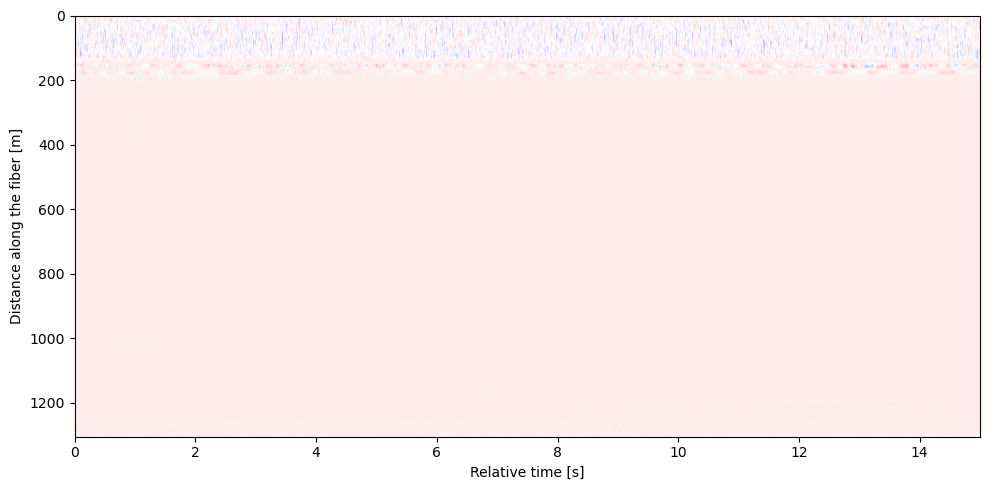

In [11]:
## Read and visualize input file
arr = Detector(f, dx, gl, fname, file_format, duration = duration); arr.visualization(savefig=True, fig_format='png')

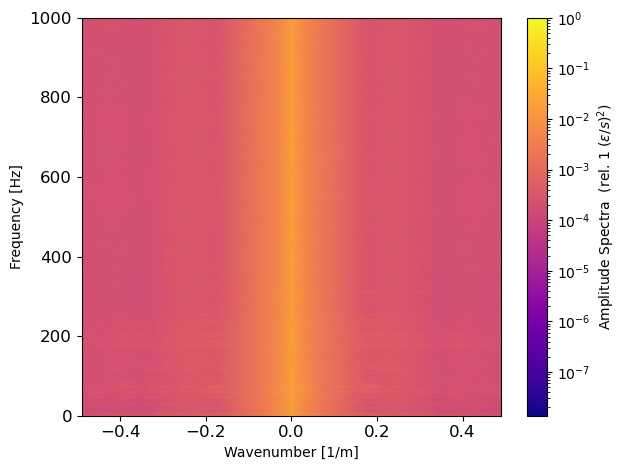

In [12]:
arr.plotfk()

# We can select a subset of the data

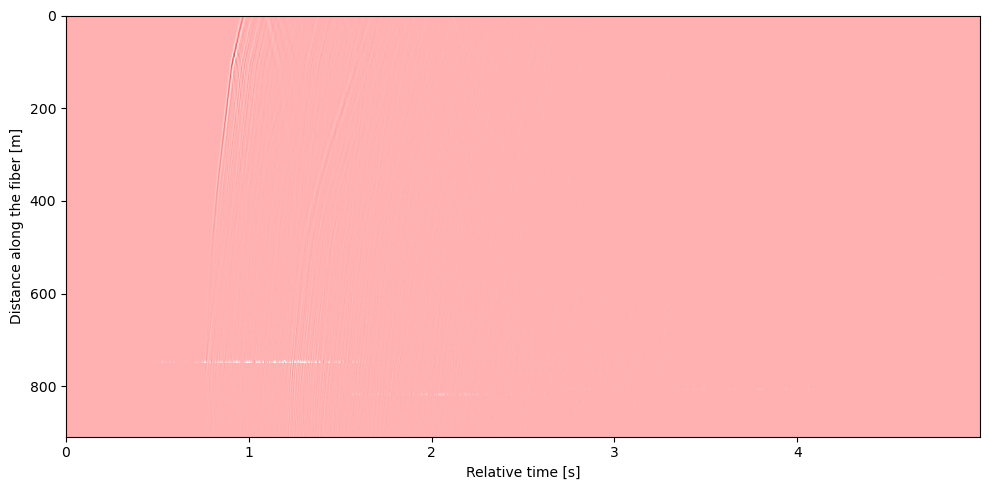

In [13]:
arr.data_select(endtime = tend, startlength = xini, endlength = xend); arr.visualization()

# Now let's pre-process the data

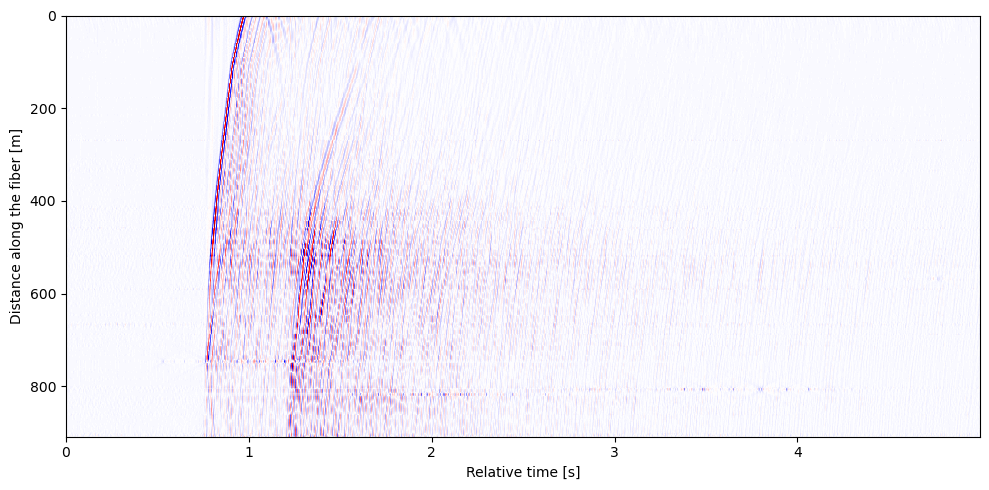

In [14]:
arr.denoise(data = arr.traces,
            sampling_rate_new = downsampling_rate,
            ftype = ftype,
            fmin = freqmin,
            fmax = freqmax,
            k0=k0,
            low_vel_events = low_vel_events);

arr.visualization()

We can visualize the FK spectrum of the data

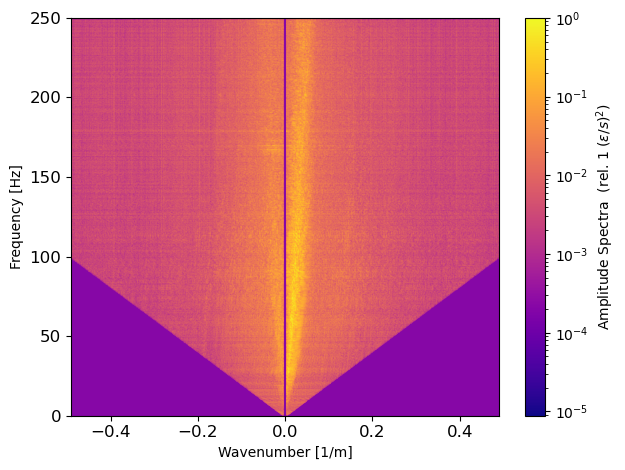

In [15]:
arr.plotfk()

# At this point we are ready to run HECTOR and look for microseismic events

In [18]:
t0=time.time()

arr.detector(ns_window = ns_window,
              a = a,
              b_step = b_step,
              c_min = c_min,
              c_max = c_max,
              c_step = c_step,
              d_static = d_static,
              d_min = d_min,
              d_max = d_max,
              d_step = d_step,
              svd = svd,
              lat_search = lat_search)

print('Total scanning time is: {} seconds'.format(time.time()-t0))

0 %
Scanning waveform coherence ....
16 %
Scanning waveform coherence ....
33 %
Scanning waveform coherence ....
50 %
Scanning waveform coherence ....
66 %
Scanning waveform coherence ....
83 %
Scanning waveform coherence ....
100 %
Scanning waveform coherence ....
Total scanning time is: 13.891984224319458 seconds


# Plot the results

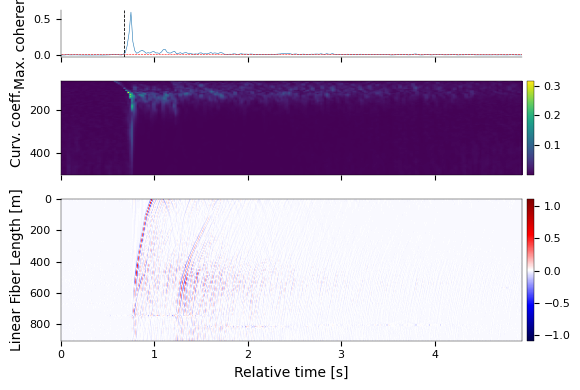

In [20]:
events = arr.detected_events(min_numb_detections, max_dist_detections)
arr.plot_report(savefig=True)

After a first run, we can tune the hyperbolae parameters with the following function

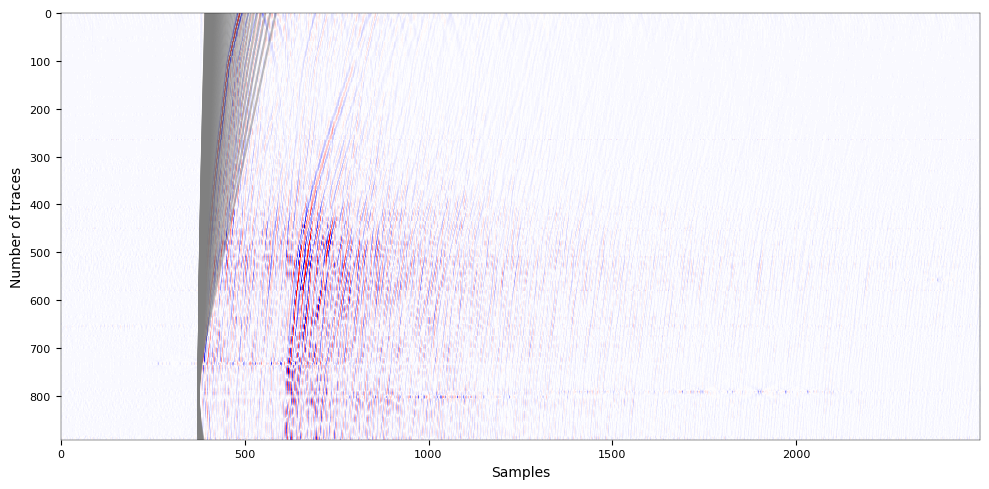

In [21]:
if lat_search == False:
    arr.hyperbolae_tuning(a, b, d_static, c_min, c_max, c_step, savefig=False)

else:
    arr.hyperbolae_tuning(a, b, arr.d_best, c_min, c_max, c_step)
    